[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AcousticOdometry/AO/blob/main/notebooks/plot_features.ipynb)

In [21]:
!pwd
!sudo make install

/content/cmake-3.22.2
Consolidate compiler generated dependencies of target cmsys
[  2%] Built target cmsys
Consolidate compiler generated dependencies of target cmsys_c
[  3%] Built target cmsys_c
Consolidate compiler generated dependencies of target cmsysTestsC
[  3%] Built target cmsysTestsC
Consolidate compiler generated dependencies of target testConsoleBufChild
[  3%] Built target testConsoleBufChild
Consolidate compiler generated dependencies of target cmsysTestDynload
[  3%] Built target cmsysTestDynload
Consolidate compiler generated dependencies of target cmsysTestsCxx
[  4%] Built target cmsysTestsCxx
Consolidate compiler generated dependencies of target cmsysTestProcess
[  5%] Built target cmsysTestProcess
Consolidate compiler generated dependencies of target cmsysTestSharedForward
[  5%] Built target cmsysTestSharedForward
Consolidate compiler generated dependencies of target cmstd
[  5%] Built target cmstd
Consolidate compiler generated dependencies of target kwiml_test
[

In [22]:
!cmake --version

cmake version 3.22.2

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [ ]:
# https://cmake.org/download/
%cd /tmp
!wget https://github.com/Kitware/CMake/releases/download/v3.22.3/cmake-3.22.3-linux-x86_64.sh \
    -o bootstrap-cmake.sh
!sudo mkdir /opt/cmake
!sudo sh ./bootstrap-cmake.sh --prefix=/opt/cmake
%cd /content

In [15]:
try:
    import colab
    COLAB_RUNTIME = True
    GITHUB_TOKEN = None
    !apt upgrade gcc
    out = !cmake --version
    # Install an appropiate CMake version from https://cmake.org/download/
    %cd /tmp
    !wget https://cmake.org/files/v3.22/cmake-3.22.2.tar.gz
    !tar -xzvf cmake-3.22.2.tar.gz
    %cd cmake-3.22.2/
    !./bootstrap
    !make -j$(nproc)
    !sudo make install
    %cd /content
except ImportError:
    COLAB_RUNTIME = False

Streaming output truncated to the last 5000 lines.
cmake-3.22.2/Tests/RunCMake/file/GLOB-CONFIGURE_DEPENDS-RerunCMake-stdout.txt
cmake-3.22.2/Tests/RunCMake/file/GLOB-CONFIGURE_DEPENDS-RerunCMake.cmake
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-CONFIGURE_DEPENDS-SCRIPT_MODE-result.txt
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-CONFIGURE_DEPENDS-SCRIPT_MODE-stderr.txt
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-CONFIGURE_DEPENDS-SCRIPT_MODE.cmake
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-CONFIGURE_DEPENDS-modified-result.txt
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-CONFIGURE_DEPENDS-modified-stderr.txt
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-CONFIGURE_DEPENDS-modified.cmake
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-LIST_DIRECTORIES-no-arg-result.txt
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-LIST_DIRECTORIES-no-arg-stderr.txt
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-LIST_DIRECTORIES-no-arg.cmake
cmake-3.22.2/Tests/RunCMake/file/GLOB-error-LIST_DIRECTORIES-not-boolean-re

In [28]:
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [26]:
!apt upgrade gcc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
The following packages will be upgraded:
  base-files binutils binutils-common binutils-x86-64-linux-gnu gnupg2 gzip
  libaudit-common libaudit1 libbinutils libc-bin libcublas-dev libcublas10
  libcudnn7 libcudnn7-dev libgnutls30 libhogweed4 libldap-2.4-2 libldap-common
  liblz4-1 libnettle6 libp11-kit0 libpam-modules libpam-modules-bin
  libpam-runtime libpam0g libpython2.7 libpython2.7-dev libpython2.7-minimal
  libpython2.7-stdlib libpython3.6 libpython3.6-dev libpython3.6-minimal
  libpython3.6-stdlib libsasl2-2 libsasl2-modules-db libseccomp2 libzstd1
  linux-libc-dev login openjdk-11-jdk-headless openjdk-11-jre
  openjdk-11-jre-headless openssl passwd python2.7 python2.7-dev
  python

In [27]:
if COLAB_RUNTIME:
    from getpass import getpass
    if not GITHUB_TOKEN:
        GITHUB_TOKEN = getpass(
            "Personal access token\n"
            r"https://docs.github.com/en/authentication/keeping-your-account-"
            r"and-data-secure/creating-a-personal-access-token"+"\n"
            )
    %pip install git+https://$GITHUB_TOKEN@github.com/AcousticOdometry/AO --verbose
    try:
        import ao
    except ImportError:
        GITHUB_TOKEN = None
        raise

Personal access token
https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token
··········
Using pip 22.0.4 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
  Cloning https://****@github.com/AcousticOdometry/AO to /tmp/pip-req-build-io9ok88w
  Running command git version
  git version 2.17.1
  Running command git clone --filter=blob:none 'https://****@github.com/AcousticOdometry/AO' /tmp/pip-req-build-io9ok88w
  Cloning into '/tmp/pip-req-build-io9ok88w'...
  Running command git rev-parse HEAD
  2bd0149aaac30158d8f1db3581d536ec43698a3a
  Resolved https://****@github.com/AcousticOdometry/AO to commit 2bd0149aaac30158d8f1db3581d536ec43698a3a
  Running command git submodule update --init --recursive -q
  Running command pip subprocess to install build dependencies
  Using pip 22.0.4 from /tmp/pip-standalone-pip-uqmddfrh/__env_pip__.zip/pip (python 3.7)
    Using cached setuptools-61.2.0-py3-none-any.whl (1.1 MB)
    Using c

ModuleNotFoundError: ignored

In [ ]:
%%capture
%pip install ipykernel
import ao
import math
import numpy as np

from matplotlib import pyplot as plt

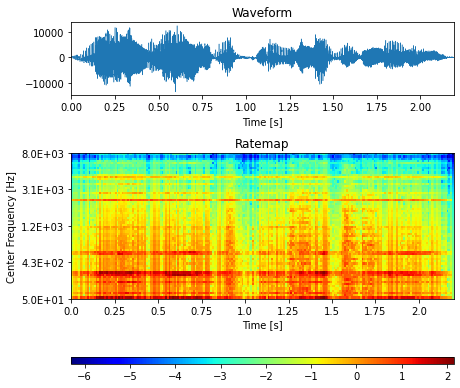

In [ ]:
audio_url = (
    r"https://staffwww.dcs.shef.ac.uk/people/N.Ma/resources"
    r"/ratemap/t29_lwwj2n_m17_lgwe7s.wav"
    )
data, sample_rate = ao.io.wave_read(audio_url)
frame_length = 10  # [ms]
frame_samples = int(
    np.ceil(frame_length / 1000 * sample_rate)
    )  # samples per frame
fig, axs = plt.subplots(
    3, 1, figsize=(6.5, 5.5), gridspec_kw={'height_ratios': [0.5, 1, 0.05]}
    )
# Signal
ao.plot.signal(data, sample_rate, ax=axs[0])
axs[0].set_title('Waveform')
# Gammatonegram
frame_length = 10  # [ms]
frame_samples = math.ceil(frame_length / 1000 * sample_rate)
plot, _ = ao.plot.gammatonegram(
    data,
    sample_rate,
    frame_samples,
    num_features=64,
    low_Hz=50,
    high_Hz=8000,
    ax=axs[1]
    )
axs[1].set_title('Ratemap')
fig.colorbar(plot, cax=axs[2], orientation="horizontal")
fig.tight_layout()

![Ratemap](https://staffwww.dcs.shef.ac.uk/people/N.Ma/resources/ratemap/ratemap.png)

In [ ]:
# TODO Check if we are in google colab -> use drive or not -> ask for path

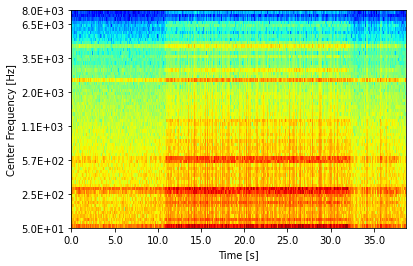

In [ ]:
# 10 deg/s + 10 kg load
data, sample_rate = ao.io.wave_read(
    r"C:\Users\esdan\OneDrive - keio.jp\Thesis\Primitive Experiment"
    r"\VAO_2022-03-08_17-24-33\audio0.wav"
    )
frame_length = 10  # [ms]
frame_samples = int(
    np.ceil(frame_length / 1000 * sample_rate)
    )  # samples per frame
plot, ax = ao.plot.gammatonegram(
    data, sample_rate, frame_samples, num_features=64, low_Hz=50, high_Hz=8000
    )

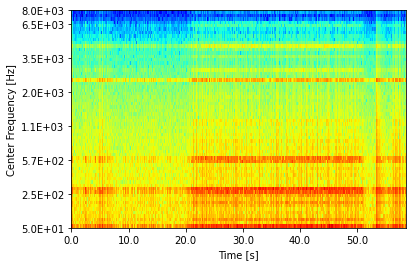

In [ ]:
# 20 deg/s + 10 kg load
data, sample_rate = ao.io.wave_read(
    r"C:\Users\esdan\OneDrive - keio.jp\Thesis\Primitive Experiment"
    r"\VAO_2022-03-08_17-21-32\audio0.wav"
    )
frame_length = 10  # [ms]
frame_samples = int(
    np.ceil(frame_length / 1000 * sample_rate)
    )  # samples per frame
plot, ax = ao.plot.gammatonegram(
    data, sample_rate, frame_samples, num_features=64, low_Hz=50, high_Hz=8000
    )